## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Rename Age column
combined_data = combined_data.rename(columns = {"Age_months": "Age (months)"})

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count_mice = combined_data["Mouse ID"].nunique()
count_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data =  combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count_mice = clean_combined_data["Mouse ID"].nunique()
clean_count_mice

248

## Summary Statistics

In [7]:
# Group data by Drug Regimen
grouped_drug_regimen = clean_combined_data.groupby("Drug Regimen")

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = grouped_drug_regimen["Tumor Volume (mm3)"].mean()
median = grouped_drug_regimen["Tumor Volume (mm3)"].median()
var = grouped_drug_regimen["Tumor Volume (mm3)"].var()
std = grouped_drug_regimen["Tumor Volume (mm3)"].std()
sem = grouped_drug_regimen["Tumor Volume (mm3)"].sem()

summary_statistics_series = pd.DataFrame({
                            "Mean": mean, 
                            "Median": median, 
                            "Variance": var, 
                            "Std Dev": std, 
                            "SEM": sem})

summary_statistics_series
                           
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_groupby = clean_combined_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

summary_statistics_groupby = summary_statistics_groupby.rename(columns={"mean":"Mean",
                                                                        "median": "Median",
                                                                        "var": "Variance",
                                                                        "std": "Std Dev",
                                                                        "sem": "SEM"})

summary_statistics_groupby

# This method produces everything in a single groupby function

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Calculate the total number of data points for each drug regimen
value_counts_drug_regimen = clean_combined_data["Drug Regimen"].value_counts()
value_counts_drug_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

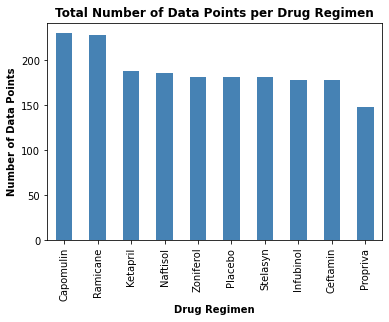

In [11]:
# Generate a bar plot showing the total number of data points for each treatment throughout the course of the study using pandas.
bar_pandas = value_counts_drug_regimen.plot(kind = "bar", color = "steelblue", width = 0.5, align = "center")
bar_pandas.set_xlabel("Drug Regimen", fontweight = "bold")
bar_pandas.set_ylabel("Number of Data Points", fontweight = "bold")
bar_pandas.set_title("Total Number of Data Points per Drug Regimen", fontweight = "bold")
plt.show()

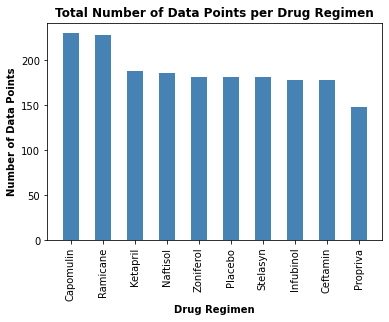

In [12]:
# Generate a bar plot showing the total number of data points for each treatment throughout the course of the study using pyplot.
x_axis = value_counts_drug_regimen.index.values
y_axis = value_counts_drug_regimen.values

bar_pyplot = plt.bar(x_axis, y_axis, color = "steelblue", width = 0.5, align = "center")
plt.xlabel("Drug Regimen", fontweight = "bold")
plt.ylabel("Number of Data Points", fontweight = "bold")
plt.title("Total Number of Data Points per Drug Regimen", fontweight = "bold")
plt.xticks(rotation = "vertical")
plt.show()

In [13]:
# Group data by Mouse ID
grouped_drug_mouse_id = clean_combined_data.groupby("Mouse ID").first()

# Calculate the total number of mice for each sex
value_counts_mice_sex = grouped_drug_mouse_id["Sex"].value_counts()
value_counts_mice_sex

Male      125
Female    123
Name: Sex, dtype: int64

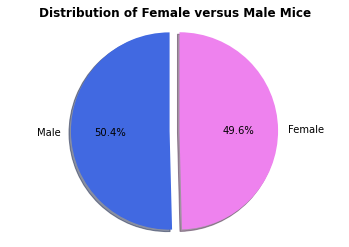

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_pandas = value_counts_mice_sex.plot(kind = "pie", explode = (0.1, 0), labels = ["Male", "Female"],
                                 colors = ["royalblue", "violet"], autopct= "%1.1f%%", shadow = True,  startangle = 90)
pie_pandas.set_ylabel("")
pie_pandas.set_title("Distribution of Female versus Male Mice", fontweight = "bold")
plt.axis("equal")
plt.show()

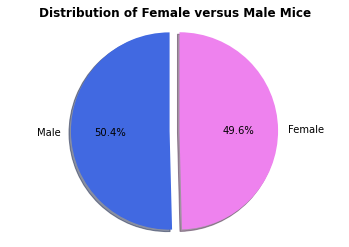

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [125, 123]
colors = ["royalblue", "violet"]
explode = (0.1, 0)

pie_pyplot = plt.pie(sizes, explode = explode, labels = labels, colors = colors, 
                     autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("Distribution of Female versus Male Mice", fontweight = "bold")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_tumor_volume = pd.merge(last_timepoint, combined_data, on = ["Mouse ID", "Timepoint"])
last_timepoint_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimen:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_timepoint_tumor_volume.loc[last_timepoint_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75]).round(4)
    lowerq = quartiles[0.25].round(4)
    upperq = quartiles[0.75].round(4)
    iqr = round((upperq - lowerq), 4)
    lower_bound = round(lowerq - (1.5*iqr), 4)
    upper_bound = round(upperq + (1.5*iqr), 4)
    
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"{drug}")
    print(f"The lower quartile is {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The interquartile range is {iqr}")
    print(f"The the median is {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if outliers.count() > 0:
        for outlier in outliers.index:
            print(f"The potential outliers are {round(outliers[outlier], 4)}.")
    print(f"----------------------------------------------------------")

Capomulin
The lower quartile is 32.3774
The upper quartile is 40.1592
The interquartile range is 7.7818
The the median is 38.1252 
Values below 20.7047 could be outliers.
Values above 51.8319 could be outliers.
----------------------------------------------------------
Ramicane
The lower quartile is 31.5605
The upper quartile is 40.659
The interquartile range is 9.0985
The the median is 36.5617 
Values below 17.9128 could be outliers.
Values above 54.3067 could be outliers.
----------------------------------------------------------
Infubinol
The lower quartile is 54.0486
The upper quartile is 65.5257
The interquartile range is 11.4771
The the median is 60.1652 
Values below 36.8329 could be outliers.
Values above 82.7414 could be outliers.
The potential outliers are 36.3213.
----------------------------------------------------------
Ceftamin
The lower quartile is 48.7221
The upper quartile is 64.2998
The interquartile range is 15.5777
The the median is 59.852 
Values below 25.3555 coul

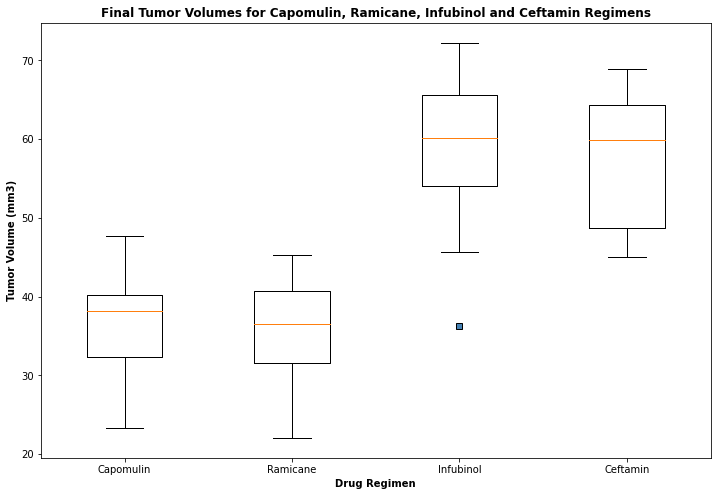

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title("Final Tumor Volumes for Capomulin, Ramicane, Infubinol and Ceftamin Regimens", fontweight = "bold")
ax1.set_ylabel("Tumor Volume (mm3)", fontweight = "bold")
ax1.set_xlabel("Drug Regimen", fontweight = "bold")
blue_circle = dict(markerfacecolor = "steelblue", marker = "s")
ax1.boxplot(tumor_volume_data, labels = drug_regimen, flierprops = blue_circle)
plt.show()

## Line and Scatter Plots

In [19]:
# Create a DataFrame of all mice treated with Capomulin
capomulin_mice = last_timepoint_tumor_volume.loc[last_timepoint_tumor_volume["Drug Regimen"] == "Capomulin"]
capomulin_mice.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
# Create a DataFrame for mouse b128
mouse_id_b128 = combined_data.loc[combined_data["Mouse ID"] == "b128"]
mouse_id_b128

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


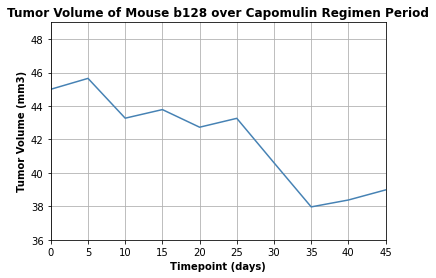

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(mouse_id_b128["Timepoint"], mouse_id_b128["Tumor Volume (mm3)"], color = "steelblue")
plt.title("Tumor Volume of Mouse b128 over Capomulin Regimen Period", fontweight = "bold")
plt.xlabel("Timepoint (days)", fontweight = "bold")
plt.ylabel("Tumor Volume (mm3)", fontweight = "bold")
plt.xlim(0, 45)
plt.ylim(36, 49)
plt.grid()
plt.show()

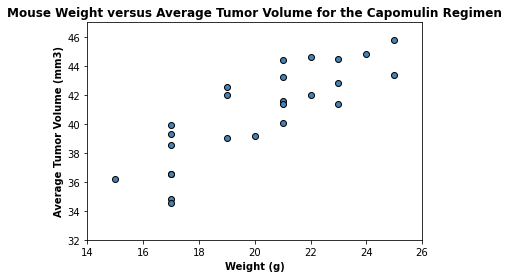

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
new_capomulin_mice = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
mean_capomulin_mice = new_capomulin_mice["Tumor Volume (mm3)"].mean()
mouse_weight = new_capomulin_mice["Weight (g)"].unique()

plt.scatter(mouse_weight, mean_capomulin_mice, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Regimen", fontweight = "bold")
plt.xlabel("Weight (g)", fontweight = "bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight = "bold")
plt.xlim(14, 26)
plt.ylim(32, 47)
plt.show()

## Correlation and Regression

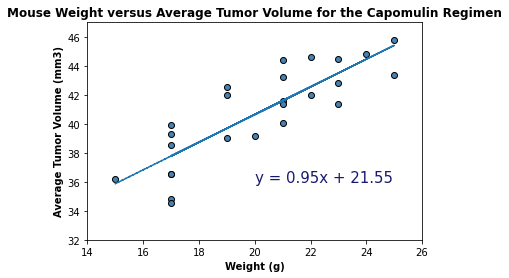

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mouse_weight.astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, mean_capomulin_mice)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, mean_capomulin_mice, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.plot(mouse_weight, regress_values, "--")
plt.annotate(line_eq, (20, 36), fontsize = 15, color = "midnightblue")
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Regimen", fontweight = "bold")
plt.xlabel("Weight (g)", fontweight = "bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight = "bold")
plt.xlim(14, 26)
plt.ylim(32, 47)
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(mouse_weight, mean_capomulin_mice)[0], 2)}.")